## 데이터 전처리 과정

1.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

5.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

9.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

13.5%IOPub me

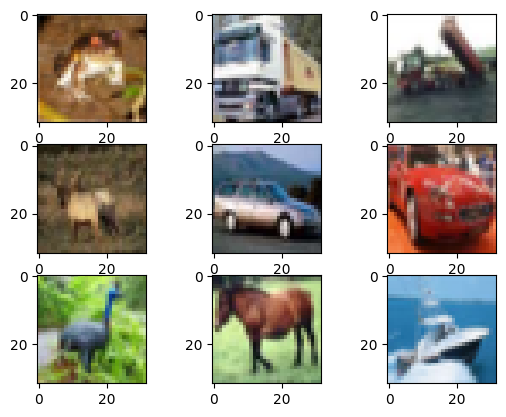

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=ToTensor()
)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(training_data.data[i])

### 데이터 증강
이미지를 조금만 변경해도 컴퓨터가 다른 이미지로 받아들임
-> 이미지를 크게 해치지 않는 선에서 변경

데이터가 부족하거나 오버 피팅을 피하는 기법으로 데이터를 의도적으로 수정하여 더 많은 데이터를 얻음 

Files already downloaded and verified
Files already downloaded and verified


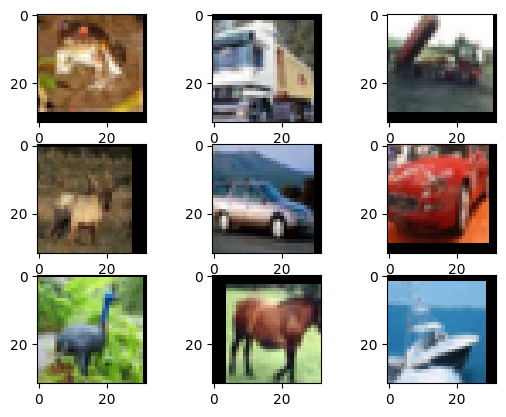

In [2]:
# 크롭핑과 좌우대칭 코드
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

#데이터 전처리 함수 
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4),  #랜덤으로 이미지 일부 제거 후 패딩
    RandomHorizontalFlip(p=0.5),  #y축으로 기준으로 대칭 
])

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=transforms
)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(transforms(training_data.data[i]))


Files already downloaded and verified
Files already downloaded and verified


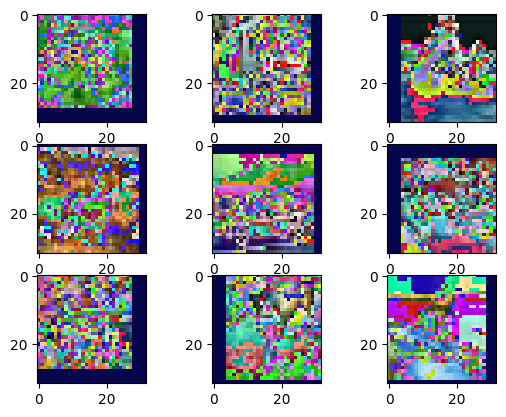

In [4]:
#데이터 정규화 과정 추가 코드
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

#데이터 전처리 함수 
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4),  #랜덤으로 이미지 일부 제거 후 패딩
    RandomHorizontalFlip(p=0.5),  #y축으로 기준으로 대칭 
    T.ToTensor(),

    Normalize(mean=[0.4914, 0.4822, 0.4465], std=(0.247, 0.243, 0.261)),
    T.ToPILImage()
])

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root="./",
    train=False,
    download=True,
    transform=transforms
)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(transforms(training_data.data[i]))
plt.show()

In [5]:
#CIFAR10 데이터 셋의 평균과 표준 편차를 구하는 코드 
import torch

training_data = CIFAR10(
    root="./",
    train=True,
    download=True,
    transform=ToTensor()
)

imgs = [item[0] for item in training_data]
# 이미지를 하나로 합침
imgs = torch.stack(imgs, dim=0).numpy()

#rgb 각 평균
mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()
print(mean_r,mean_g,mean_b)

std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
print(std_r,std_g,std_b)

Files already downloaded and verified
0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768
